# San Diego Housing and Transit Data Analysis

This notebook explores the relationship between public transit locations and home values in San Diego using:

- Zillow Home Value Index (ZHVI) data by neighborhood (2000–2025)
- San Diego transit stop location data (2025)

The goal is to visualize historical home value trends and spatial distribution of public transportation infrastructure.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
zhvi_neigh = pd.read_csv('sd_zhvi_2000_to_2025_nhbd.csv')
transit_stops = pd.read_csv('transit_stops_datasd.csv')


## Zillow Home Value Trends (ZHVI)

The following plot compares ZHVI trends across five selected San Diego neighborhoods from 2000 to 2025.


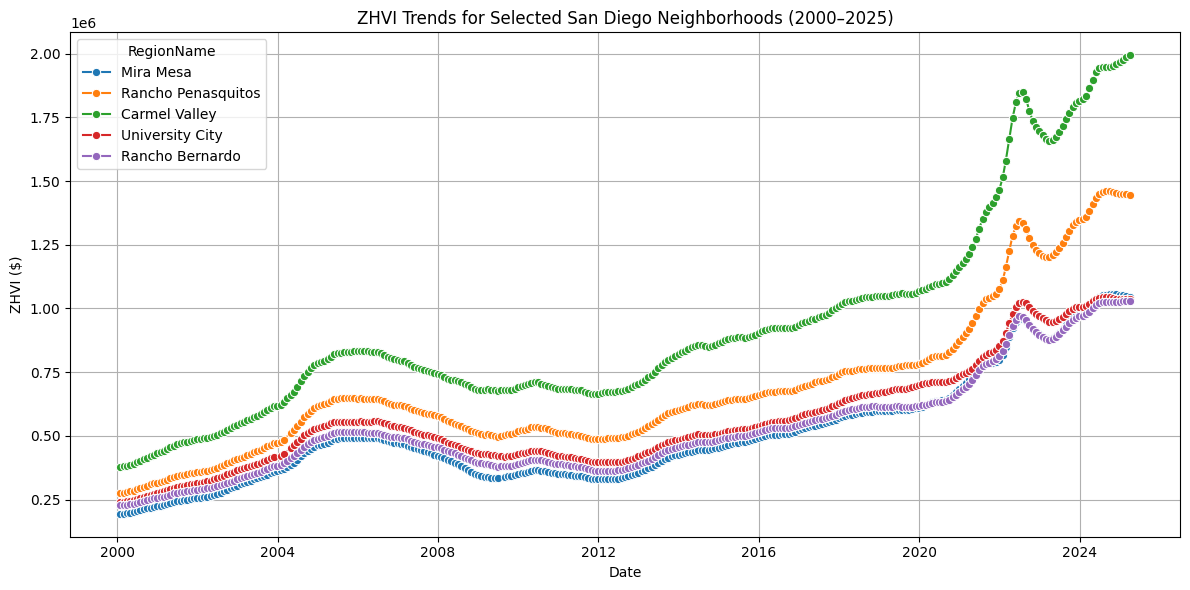

In [2]:

selected_neigh = ['Mira Mesa', 'Rancho Penasquitos', 'Carmel Valley', 'University City', 'Rancho Bernardo']
zhvi_subset = zhvi_neigh[zhvi_neigh['RegionName'].isin(selected_neigh)]

# Melt for plotting
zhvi_melted = zhvi_subset.melt(id_vars='RegionName', value_vars=zhvi_neigh.columns[9:], 
                               var_name='Date', value_name='ZHVI')
zhvi_melted['Date'] = pd.to_datetime(zhvi_melted['Date'])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=zhvi_melted, x='Date', y='ZHVI', hue='RegionName', marker='o')
plt.title('ZHVI Trends for Selected San Diego Neighborhoods (2000–2025)')
plt.ylabel('ZHVI ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Transit Stop Locations (2025)

This scatterplot shows the geographic distribution of transit stops in San Diego based on 2025 data.


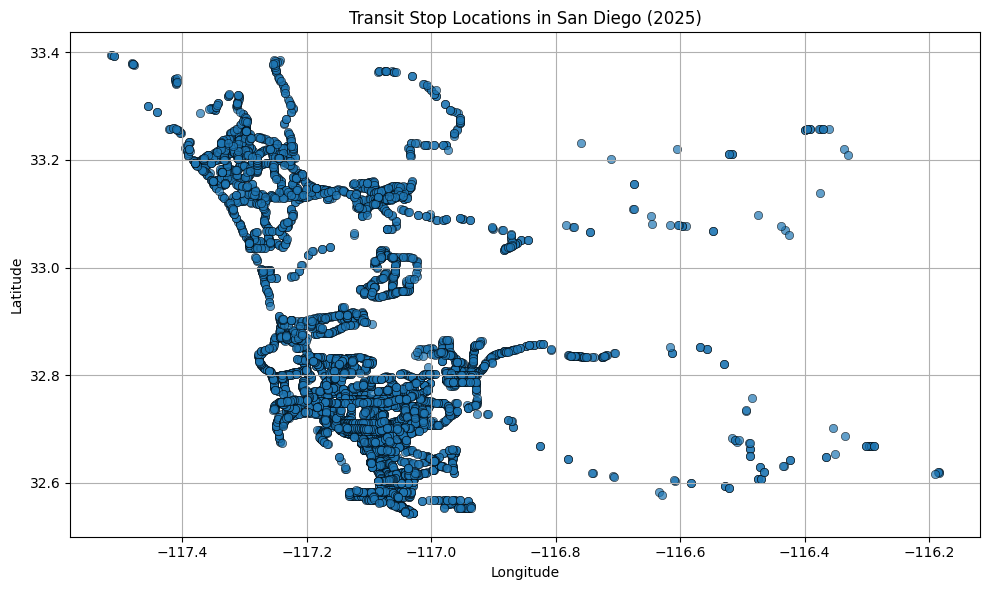

In [3]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=transit_stops, x='lng', y='lat', alpha=0.7, edgecolor='k')
plt.title('Transit Stop Locations in San Diego (2025)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()
